**LOADING THE DATASET**

In [ ]:
import pandas as pd

# Dataset loading
df = pd.read_csv("water_potability.csv")

# Displaying a few dataset details
print("First 5 rows of the dataset:")
print(df.head())

# Checking for missing values
print("\n Missing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

 Missing values in each column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfa

**DATA VISUALIZATION**


**CLASS DISTRIBUTION**

<ipython-input-91-fa7e8d8c7920>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Potability'], palette="viridis")


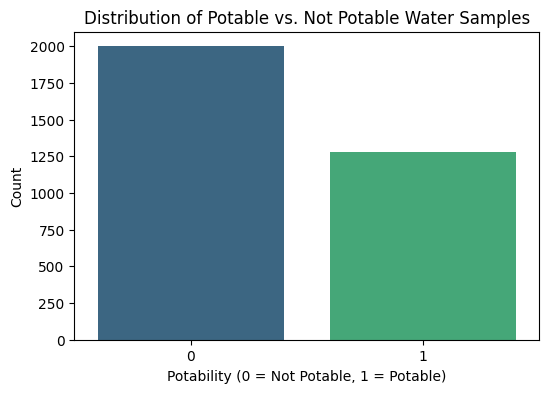

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Potability'], palette="viridis")
plt.title("Distribution of Potable vs. Not Potable Water Samples")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()

**FEATURES DISTRIBUTION**

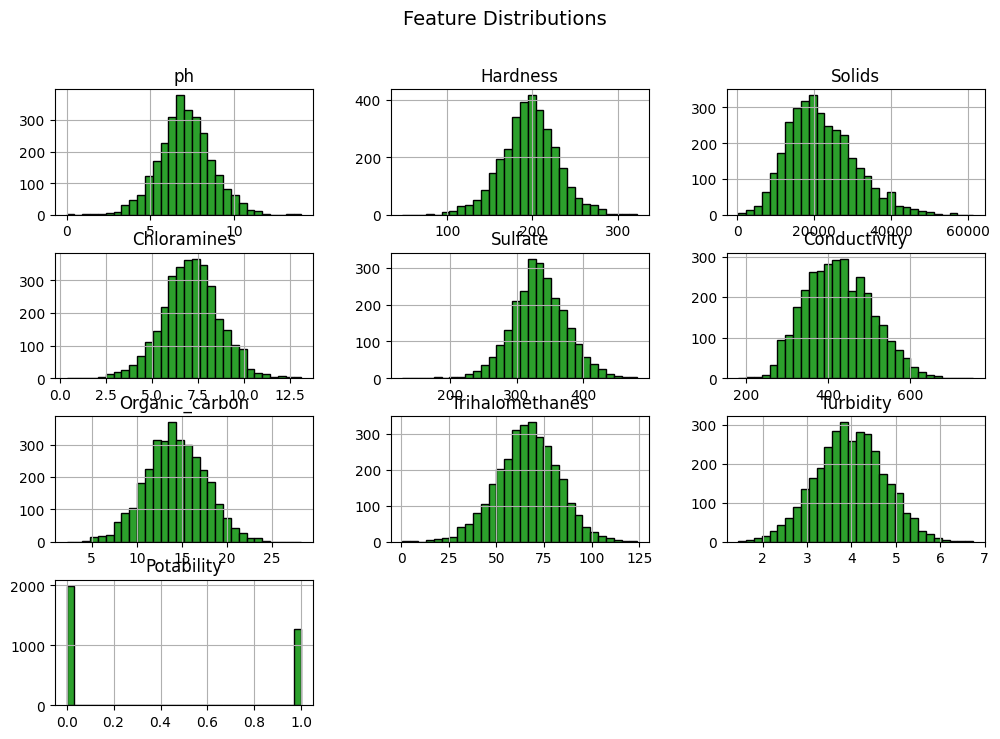

In [ ]:
# Plotting histograms for each feature)
df.hist(figsize=(12,8), bins=30, color='#2ca02c', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

**FEATURE CORRELATION HEATMAP**

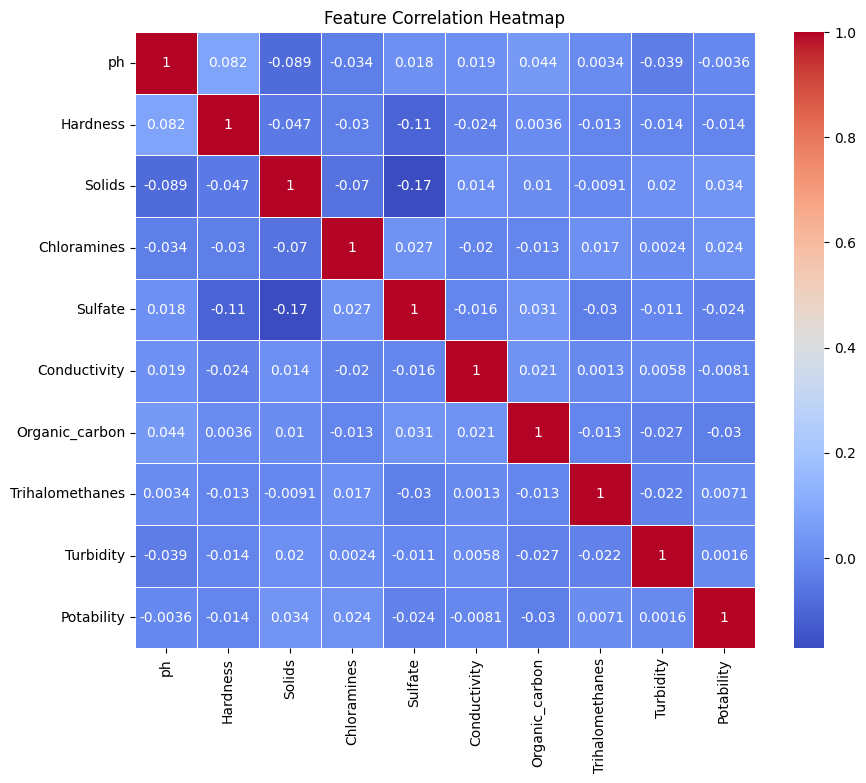

In [ ]:
# Computing the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**DATA PRE-PROCESSING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Handling missing values
df.fillna(df.mean(), inplace=True)

# Defining features (X) and target (y)
X = df.drop(columns=['Potability'])
y = df['Potability']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Shape
print(f" Feature matrix shape: {X_scaled.shape}")
print(f" Target vector shape: {y.shape}")


 Feature matrix shape: (3276, 9)
 Target vector shape: (3276,)


**DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset: 70% training, validation (15%) and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print sample sizes
print(f" Training Samples: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")


 Training Samples: 2293, Validation: 491, Test: 492


**MODEL ARCHITECTURE (BUILDING A NEURAL NETWORK WITH L2 REGULARIZATION & DROPOUT**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Defining the model with L2 Regularization & Dropout
def build_the_model():
    the_model = keras.Sequential([
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.007), input_shape=(X_train.shape[1],)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', kernel_regularizer=l2(0.007)),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu', kernel_regularizer=l2(0.007)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    return the_model

# Creating the model instance
the_model = build_the_model()

# Displaying the model architecture
the_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

**APPLYING LEARNING RATE SCHEDULING, EARLY STOPPING & CLASS WEIGHTING**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=7, min_lr=1e-5)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Class weights
class_weight_dict = {0: 1, 1: 2}


**TRAINING THE MODEL**

In [ ]:
# Compiling the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.002)
the_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_the_model = the_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4206 - loss: 1.4126 - val_accuracy: 0.3910 - val_loss: 0.9860 - learning_rate: 0.0020
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4134 - loss: 1.1676 - val_accuracy: 0.4216 - val_loss: 0.8335 - learning_rate: 0.0020
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4724 - loss: 1.0443 - val_accuracy: 0.5866 - val_loss: 0.7577 - learning_rate: 0.0020
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5699 - loss: 0.9785 - val_accuracy: 0.5723 - val_loss: 0.7400 - learning_rate: 0.0020
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5901 - loss: 0.9516 - val_accuracy: 0.6314 - val_loss: 0.7179 - learning_rate: 0.0020
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5966 - loss: 0.9262 - val_accuracy: 0.6314 - val_loss: 0.7112 - learning_rate: 0.0020
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6033 - loss: 0.9410 - val_ac

**EVALUATING THE MODEL**

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.6559 
Test Accuracy: 0.6646
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy: 0.6646
F1 Score: 0.5714
Recall: 0.5729
Precision: 0.5699


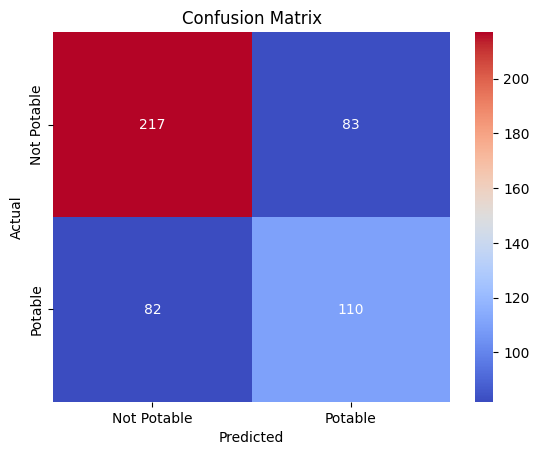

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Importing confusion_matrix

# Evaluating the model on test set
test_loss, test_acc = the_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Generating predictions
y_pred = (the_model.predict(X_test) > 0.5).astype("int32")

# Computing classification metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Not Potable", "Potable"], output_dict=True)

# Extracting the key metrics
f1_score = report["Potable"]["f1-score"]
recall = report["Potable"]["recall"]
precision = report["Potable"]["precision"]

# Printing results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()